In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading the csv file 
teams = pd.read_csv('Teams.csv')
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [2]:
## Selecting variables and seasons of interest
my_teams = teams.loc[teams['yearID'] > 2000, ['teamID', 'yearID', 'lgID', 'G', 'W', 'L', 'R', 'RA']]
my_teams.head()

,teamID,yearID,lgID,G,W,L,R,RA
2355,ANA,2001,AL,162,75,87,691,730
2356,ARI,2001,NL,162,92,70,818,677
2357,ATL,2001,NL,162,88,74,729,643
2358,BAL,2001,AL,162,63,98,687,829
2359,BOS,2001,AL,161,82,79,772,745


In [3]:
## Computing RD and Wpct
my_teams['RD'] = my_teams['R'] - my_teams['RA']
my_teams['Wpct'] = my_teams['W'] / (my_teams['W'] + my_teams['L'])
my_teams.head()

,teamID,yearID,lgID,G,W,L,R,RA,RD,Wpct
2355,ANA,2001,AL,162,75,87,691,730,-39,0.462963
2356,ARI,2001,NL,162,92,70,818,677,141,0.567901
2357,ATL,2001,NL,162,88,74,729,643,86,0.543210
2358,BAL,2001,AL,162,63,98,687,829,-142,0.391304
2359,BOS,2001,AL,161,82,79,772,745,27,0.509317


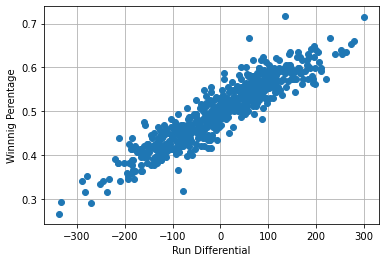

In [4]:
## Visualizing RD and Wpct
plt.plot('RD', 'Wpct', 'o', data = my_teams)
plt.xlabel('Run Differential')
plt.ylabel('Winnnig Perentage')
plt.grid()

## saving the plot
# plt.savefig('chapter7_plot1.pdf')

plt.show()

In [5]:
import statsmodels.formula.api as smf

## Building the linear model 
lm_md = smf.ols(formula = 'Wpct ~ RD', data = my_teams).fit()

## Extracting model results
lm_md.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wpct   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     3542.
Date:                Sun, 14 Nov 2021   Prob (F-statistic):          1.95e-253
Time:                        23:27:16   Log-Likelihood:                 1289.3
No. Observations:                 600   AIC:                            -2575.
Df Residuals:                     598   BIC:                            -2566.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5000      0.001    433.296      0.000       0.498       0.502
RD             0.0006   1.06e-05     59.517      0.000       0.001       0.001
==============================================================================
Omnibus:                       35.826   Durbin-Watson:                   2.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.031
Skew:                           0.250   Prob(JB):                     8.51e-22
Kurtosis:                       4.905   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

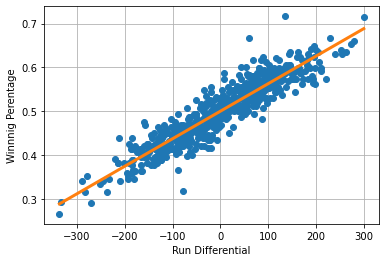

In [6]:
## Visualizing the fitted line 
x = pd.DataFrame({'RD': np.linspace(-337, 300, num = 1000)})
y = lm_md.predict(x)

plt.plot('RD', 'Wpct', 'o', data = my_teams)
plt.plot(x, y, linewidth = 3)
plt.xlabel('Run Differential')
plt.ylabel('Winnnig Perentage')
plt.grid()

## saving the plot
# plt.savefig('chapter7_plot2.pdf')

plt.show()

In [7]:
## Computing the winning percentage using 7.1
my_teams['Wpct_pyt'] = my_teams['R']**2 / (my_teams['R']**2 + my_teams['RA']**2)
my_teams.head()

,teamID,yearID,lgID,G,W,L,R,RA,RD,Wpct,Wpct_pyt
2355,ANA,2001,AL,162,75,87,691,730,-39,0.462963,0.472575
2356,ARI,2001,NL,162,92,70,818,677,141,0.567901,0.593483
2357,ATL,2001,NL,162,88,74,729,643,86,0.543210,0.562437
2358,BAL,2001,AL,162,63,98,687,829,-142,0.391304,0.407147
2359,BOS,2001,AL,161,82,79,772,745,27,0.509317,0.517793


In [8]:
## Computing the log-ratios
my_teams['log_W_L'] = np.log(my_teams['W'] / my_teams['L'])
my_teams['log_R_RA'] = np.log(my_teams['R'] / my_teams['RA'])
my_teams.head()

,teamID,yearID,lgID,G,W,L,R,RA,RD,Wpct,Wpct_pyt,log_W_L,log_R_RA
2355,ANA,2001,AL,162,75,87,691,730,-39,0.462963,0.472575,-0.148420,-0.054905
2356,ARI,2001,NL,162,92,70,818,677,141,0.567901,0.593483,0.273293,0.189191
2357,ATL,2001,NL,162,88,74,729,643,86,0.543210,0.562437,0.173272,0.125529
2358,BAL,2001,AL,162,63,98,687,829,-142,0.391304,0.407147,-0.441833,-0.187886
2359,BOS,2001,AL,161,82,79,772,745,27,0.509317,0.517793,0.037271,0.035600


In [9]:
## Estimating k in 7.4
lm_pyt = smf.ols(formula = 'log_W_L ~ 0 + log_R_RA', data = my_teams).fit()

## Extracting model results
lm_pyt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                log_W_L   R-squared (uncentered):                   0.879
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                              4356.
Date:                Sun, 14 Nov 2021   Prob (F-statistic):                   5.32e-277
Time:                        23:27:17   Log-Likelihood:                          498.72
No. Observations:                 600   AIC:                                     -995.4
Df Residuals:                     599   BIC:                                     -991.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
log_R_RA       1.8498      0.028     65.997      0.000       1.795       1.905
==============================================================================
Omnibus:                        8.004   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.901
Skew:                           0.270   Prob(JB):                       0.0192
Kurtosis:                       3.159   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
## Creating Caola's IR formula
def IR(RS, RA):
    y = (RS**2 + RA**2)**2 / (2*RS*RA**2)
    return y

In [11]:
from itertools import product

def expand_grid(dictionary):
    return pd.DataFrame([row for row in product(*dictionary.values())], columns = dictionary.keys())

## Creating combinations of RS and RA
dictionary = {'RS': [3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0], 
              'RA': [3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]}

IR_table = expand_grid(dictionary)

## Computing the IR
IR_table['IR'] = IR(IR_table['RS'], IR_table['RA'])
round(IR_table, 1)

,RS,RA,IR
0,3.0,3.0,6.0
1,3.0,3.5,6.1
2,3.0,4.0,6.5
3,3.0,4.5,7.0
4,3.0,5.0,7.7
5,3.0,5.5,8.5
6,3.0,6.0,9.4
7,3.5,3.0,7.2
8,3.5,3.5,7.0
9,3.5,4.0,7.1


# Value of Plays Using Runs Expectancy

In [12]:
## Reading 2016 season data 
data2016 = pd.read_csv('all2016.csv')
data2016.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (64,65,84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GAME_ID,AWAY_TEAM_ID,INN_CT,BAT_HOME_ID,OUTS_CT,BALLS_CT,STRIKES_CT,PITCH_SEQ_TX,AWAY_SCORE_CT,HOME_SCORE_CT,...,REMOVED_FOR_PH_BAT_FLD_CD,PO1_FLD_CD,PO2_FLD_CD,PO3_FLD_CD,ASS1_FLD_CD,ASS2_FLD_CD,ASS3_FLD_CD,ASS4_FLD_CD,ASS5_FLD_CD,EVENT_ID
0,ANA201604040,CHN,1,0,0,1,0,BX,0,0,...,0,0,0,0,0,0,0,0,0,1
1,ANA201604040,CHN,1,0,0,0,0,X,0,0,...,0,3,0,0,6,0,0,0,0,2
2,ANA201604040,CHN,1,0,1,0,2,SFS,0,0,...,0,2,0,0,0,0,0,0,0,3
3,ANA201604040,CHN,1,0,2,1,1,BCX,0,0,...,0,0,0,0,0,0,0,0,0,4
4,ANA201604040,CHN,1,0,2,2,2,BSS*B1S,1,0,...,0,3,0,0,2,0,0,0,0,5


In [13]:
## Computing the three variables 
data2016['RUNS'] = data2016['AWAY_SCORE_CT'] + data2016['HOME_SCORE_CT']
data2016['GAME_ID'] = data2016['GAME_ID'].astype(str)
data2016['INN_CT'] = data2016['INN_CT'].astype(str)
data2016['BAT_HOME_ID'] = data2016['BAT_HOME_ID'].astype(str)
data2016['HALF.INNING'] = data2016['GAME_ID'] + data2016['INN_CT'] + data2016['BAT_HOME_ID']
data2016['RUNS.SCORED'] = np.where(data2016['BAT_DEST_ID'] > 3, 1, 0) + np.where(data2016['RUN1_DEST_ID'] > 3, 1, 0) + np.where(data2016['RUN2_DEST_ID'] > 3, 1, 0) + np.where(data2016['RUN3_DEST_ID'] > 3, 1, 0)
data2016.head()

,GAME_ID,AWAY_TEAM_ID,INN_CT,BAT_HOME_ID,OUTS_CT,BALLS_CT,STRIKES_CT,PITCH_SEQ_TX,AWAY_SCORE_CT,HOME_SCORE_CT,...,PO3_FLD_CD,ASS1_FLD_CD,ASS2_FLD_CD,ASS3_FLD_CD,ASS4_FLD_CD,ASS5_FLD_CD,EVENT_ID,RUNS,HALF.INNING,RUNS.SCORED
0,ANA201604040,CHN,1,0,0,1,0,BX,0,0,...,0,0,0,0,0,0,1,0,ANA20160404010,0
1,ANA201604040,CHN,1,0,0,0,0,X,0,0,...,0,6,0,0,0,0,2,0,ANA20160404010,0
2,ANA201604040,CHN,1,0,1,0,2,SFS,0,0,...,0,0,0,0,0,0,3,0,ANA20160404010,0
3,ANA201604040,CHN,1,0,2,1,1,BCX,0,0,...,0,0,0,0,0,0,4,0,ANA20160404010,1
4,ANA201604040,CHN,1,0,2,2,2,BSS*B1S,1,0,...,0,2,0,0,0,0,5,1,ANA20160404010,0
